In [1705]:
import copy

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# loading the train set
kdd_train = pd.read_csv('EvalResources/KDDTrain+.txt', sep=",", header=None)
kdd_train = kdd_train[kdd_train.columns[:-1]]  # tags column
titles = pd.read_csv('EvalResources/Field Names.csv', header=None)
label = pd.Series(['label'], index=[41])
titles = pd.concat([titles[0], label])
kdd_train.columns = titles.to_list()
kdd_train_original = kdd_train.drop(['num_outbound_cmds'],axis=1)

kdd_train_original

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [1706]:
# load test set
kdd_test = pd.read_csv('EvalResources/KDDTest+.txt', sep=",", header=None)
kdd_test_ = kdd_test.sort_index(axis=1)
kdd_test = kdd_test[kdd_test.columns[:-1]]
kdd_test.columns = titles.to_list()
kdd_test = kdd_test.drop(['num_outbound_cmds'],axis=1)
kdd_test_original = kdd_test

kdd_test_original

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [1707]:
# list of single attacks in both train set and test set
dos_attacks = ['apache2', 'back', 'land', 'mailbomb','neptune', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm']

probe_attacks = ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']

# Last two are dubious
r2l_attacks = ['ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'warezmaster', 'xlock', 'xsnoop', 'spy', 'warezclient']

u2r_attacks = ['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm']

no_attack = ['normal']

categorical_features = ['protocol_type', 'service', 'flag']

In [1708]:
# Minimum features obtained via ICFS for classifier 1 and 2

with open('KBProcess/AWS Downloads/MinimalFeatures/NSL_features_l1.txt', 'r') as f:
    common_features_l1 = f.read().split(',')

with open('KBProcess/AWS Downloads/MinimalFeatures/NSL_features_l2.txt', 'r') as f:
    common_features_l2 = f.read().split(',')

In [1709]:
# Utility function for evaluating NaN values

def nan_vals(data):    
    nan_df = data.isna()
    
    if nan_df.any().any():
        print("There are NaN values in the DataFrame")
    else:
        print("There are no NaN values in the DataFrame")

# LAYER1 TRAIN AND VALIDATION PROCESSING

In [1710]:
import copy

kdd_train = copy.deepcopy(kdd_train_original)
kdd_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [1711]:
# Now we select only the rows that refer to DoS and Probe attacks

df_train = kdd_train[kdd_train['label'].isin(dos_attacks+probe_attacks+no_attack)]

labels = df_train['label']
labels_df = pd.DataFrame(labels)

df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [1712]:
labels_df

,label
0,normal
1,normal
2,neptune
3,normal
4,normal
...,...
125968,neptune
125969,normal
125970,normal
125971,neptune


#### OneHotEncoding

In [1713]:
kdd_train_cat_l1 = df_train[categorical_features]

kdd_train_cat_l1

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
125968,tcp,private,S0
125969,udp,private,SF
125970,tcp,smtp,SF
125971,tcp,klogin,S0


In [1714]:
from sklearn.preprocessing import OneHotEncoder

# Encoding the categorical features as one-hot-encodings
ohe_train_l1 = OneHotEncoder(handle_unknown='ignore')

label_enc = ohe_train_l1.fit_transform(kdd_train_cat_l1)
label_enc.toarray()
new_labels = ohe_train_l1.get_feature_names_out(categorical_features)
df_cat_encoded_l1 = pd.DataFrame(data=label_enc.toarray(), columns=new_labels)

df_cat_encoded_l1

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124921,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
124922,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
124923,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
124924,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### MinMax Scaling

In [1715]:
# Selecting only the optimal features for layer1 obtained offline

df_train_l1 = df_train[common_features_l1]
df_train_l1

,logged_in,count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,dst_host_rerror_rate
0,0,2,0.0,0.0,0.0,1.00,0.00,0.00,25,0.17,0.03,0.17,0.00,0.00,0.00,0.00,0.05
1,0,13,0.0,0.0,0.0,0.08,0.15,0.00,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,123,1.0,0.0,0.0,0.05,0.07,0.00,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,1,5,0.2,0.0,0.0,1.00,0.00,0.00,255,1.00,0.00,0.03,0.04,0.03,0.01,0.01,0.00
4,1,30,0.0,0.0,0.0,1.00,0.00,0.09,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,184,1.0,0.0,0.0,0.14,0.06,0.00,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,0,2,0.0,0.0,0.0,1.00,0.00,0.00,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,1,1,0.0,0.0,0.0,1.00,0.00,0.00,30,0.12,0.06,0.00,0.00,0.72,0.00,0.00,0.01
125971,0,144,1.0,0.0,0.0,0.06,0.05,0.00,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [1716]:
from sklearn.preprocessing import MinMaxScaler

scaler_train_l1 = MinMaxScaler()

df_minmax = scaler_train_l1.fit_transform(df_train_l1)
df_train_l1_scaled = pd.DataFrame(df_minmax, columns=df_train_l1.columns)

df_train_l1_scaled

,logged_in,count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,dst_host_rerror_rate
0,0.0,0.003914,0.0,0.0,0.0,1.00,0.00,0.00,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.00,0.05
1,0.0,0.025440,0.0,0.0,0.0,0.08,0.15,0.00,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.240705,1.0,0.0,0.0,0.05,0.07,0.00,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,1.0,0.009785,0.2,0.0,0.0,1.00,0.00,0.00,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.01,0.00
4,1.0,0.058708,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124921,0.0,0.360078,1.0,0.0,0.0,0.14,0.06,0.00,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
124922,0.0,0.003914,0.0,0.0,0.0,1.00,0.00,0.00,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
124923,1.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.00,0.01
124924,0.0,0.281800,1.0,0.0,0.0,0.06,0.05,0.00,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [1717]:
# Now we can reassemble the whole dataset for layer1, we add labels too since we want to have a balanced split between train and validation
frames = [df_train_l1_scaled.reset_index(drop=True), df_cat_encoded_l1.reset_index(drop=True), labels_df.reset_index(drop=True)]

df_train_l1 = pd.concat(frames, axis=1)

df_train_l1

,logged_in,count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,0.0,0.003914,0.0,0.0,0.0,1.00,0.00,0.00,0.098039,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
1,0.0,0.025440,0.0,0.0,0.0,0.08,0.15,0.00,0.003922,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
2,0.0,0.240705,1.0,0.0,0.0,0.05,0.07,0.00,0.101961,0.10,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,neptune
3,1.0,0.009785,0.2,0.0,0.0,1.00,0.00,0.00,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
4,1.0,0.058708,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124921,0.0,0.360078,1.0,0.0,0.0,0.14,0.06,0.00,0.098039,0.10,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,neptune
124922,0.0,0.003914,0.0,0.0,0.0,1.00,0.00,0.00,0.956863,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
124923,1.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,0.117647,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
124924,0.0,0.281800,1.0,0.0,0.0,0.06,0.05,0.00,0.031373,0.03,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,neptune


In [1718]:
# Now we can split into train and validation sets
kdd_train_l1, kdd_val_l1 = train_test_split(df_train_l1, test_size=0.2, random_state=42)

kdd_train_l1

,logged_in,count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
20996,1.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
402,0.0,0.502935,1.0,0.0,0.0,0.07,0.05,0.00,0.007843,0.01,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,neptune
18144,1.0,0.013699,0.0,0.0,0.0,1.00,0.00,0.00,0.996078,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
104750,0.0,0.150685,0.0,0.0,0.0,1.00,0.00,0.01,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
115051,0.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,0.019608,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.477495,1.0,0.0,0.0,0.04,0.06,0.00,0.039216,0.04,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,neptune
103694,1.0,0.001957,0.0,0.0,0.0,1.00,0.00,1.00,0.537255,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
860,0.0,0.088063,1.0,0.0,0.0,0.04,0.13,0.00,0.039216,0.04,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,neptune
15795,1.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal


In [1719]:
nan_vals(kdd_train_l1)

There are no NaN values in the DataFrame


In [1720]:
kdd_val_l1

,logged_in,count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
2231,0.0,0.001957,0.0,1.0,1.0,1.00,0.00,0.00,0.007843,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ipsweep
31867,0.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,0.039216,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,ipsweep
96587,0.0,0.569472,1.0,0.0,0.0,0.03,0.05,0.00,0.003922,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,neptune
68329,1.0,0.001957,0.0,1.0,1.0,1.00,0.00,0.00,0.086275,0.13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
108398,1.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669,0.0,0.518591,1.0,0.0,0.0,0.07,0.06,0.00,0.074510,0.07,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,neptune
38994,1.0,0.009785,0.0,0.0,0.0,1.00,0.00,0.33,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
35372,0.0,0.086106,1.0,0.0,0.0,0.34,0.09,0.00,0.250980,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,neptune
81564,0.0,0.667319,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,smurf


In [1721]:
nan_vals(kdd_val_l1)

There are no NaN values in the DataFrame


In [1722]:
from matplotlib import pyplot as plt

def plot_util(data):    
    # Separate features and labels
    features = data.drop('label', axis=1)
    labels = data['label']
    
    # Build the major category attacks array
    attacks = []
    for item in labels:
        if item in ["back", "land", "neptune", "pod", "smurf", "teardrop"]:
            attacks.append("dos")
        elif item in ["ipsweep", "nmap", "portsweep", "satan"]:
            attacks.append("probe")
        elif item in ["ftp_write", "guess_passwd", "imap", "multihop", "phf", "spy", "warezmaster", "warezclient"]:
            attacks.append("r2l")
        elif item in ["buffer_overflow", "loadmodule", "perl", "rootkit"]:
            attacks.append("u2r")
        else: 
            attacks.append("normal")
            
    # Plot histograms
    df_hist = copy.deepcopy(features)
    df_hist['attack_cat'] = attacks
    df_hist['labels'] = labels
    
    plt.figure(figsize=(12, 6))
    plt.hist(df_hist['attack_cat'], bins=10, color='skyblue', align='mid')
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.ylabel('')
    plt.title('')
    plt.savefig('Attacks histogram')

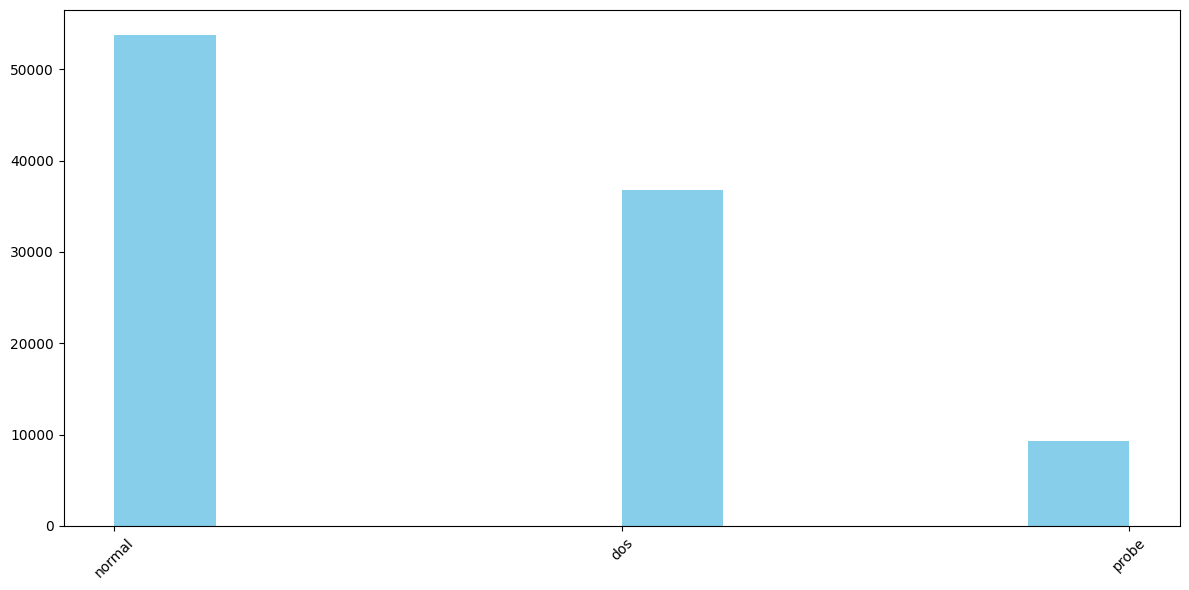

In [1723]:
plot_util(kdd_train_l1)

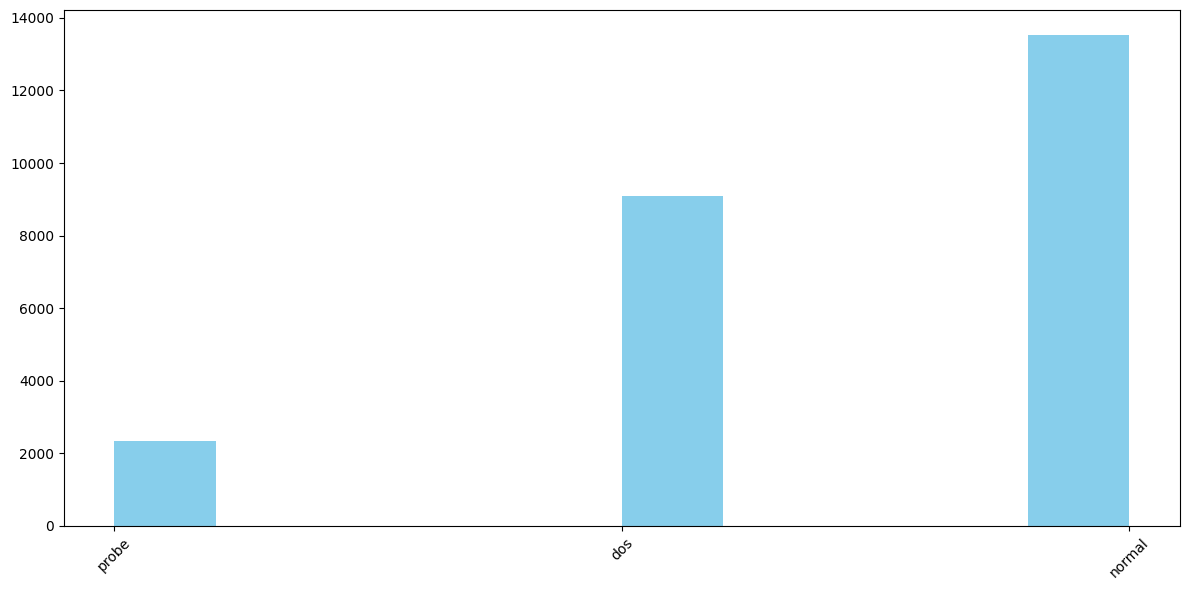

In [1724]:
plot_util(kdd_val_l1)

In [1725]:
# Lastly, we replace the labels with target variables that are actually used by the classifiers

y_train_l1 = np.array([1 if x in (dos_attacks+probe_attacks) else 0 for x in kdd_train_l1['label']])
y_train_l1 = y_train_l1.astype(int)
targets = pd.DataFrame(y_train_l1, columns=['target'])
x_train_l1 = pd.concat([kdd_train_l1.reset_index(drop=True).drop('label', axis=1), targets], axis=1)

x_train_l1

,logged_in,count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target
0,1.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.0,0.502935,1.0,0.0,0.0,0.07,0.05,0.00,0.007843,0.01,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,0.013699,0.0,0.0,0.0,1.00,0.00,0.00,0.996078,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.0,0.150685,0.0,0.0,0.0,1.00,0.00,0.01,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,0.019608,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935,0.0,0.477495,1.0,0.0,0.0,0.04,0.06,0.00,0.039216,0.04,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
99936,1.0,0.001957,0.0,0.0,0.0,1.00,0.00,1.00,0.537255,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
99937,0.0,0.088063,1.0,0.0,0.0,0.04,0.13,0.00,0.039216,0.04,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
99938,1.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [1726]:
y_val_l1 = np.array([1 if x in (dos_attacks+probe_attacks) else 0 for x in kdd_val_l1['label']])
y_val_l1 = y_val_l1.astype(int)
targets = pd.DataFrame(y_val_l1, columns=['target'])
x_val_l1 = pd.concat([kdd_val_l1.reset_index(drop=True).drop('label', axis=1), targets], axis=1)

x_val_l1

,logged_in,count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target
0,0.0,0.001957,0.0,1.0,1.0,1.00,0.00,0.00,0.007843,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,0.039216,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.0,0.569472,1.0,0.0,0.0,0.03,0.05,0.00,0.003922,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,0.001957,0.0,1.0,1.0,1.00,0.00,0.00,0.086275,0.13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,0.001957,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24981,0.0,0.518591,1.0,0.0,0.0,0.07,0.06,0.00,0.074510,0.07,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
24982,1.0,0.009785,0.0,0.0,0.0,1.00,0.00,0.33,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
24983,0.0,0.086106,1.0,0.0,0.0,0.34,0.09,0.00,0.250980,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
24984,0.0,0.667319,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [1727]:
nan_vals(x_train_l1)
nan_vals(x_val_l1)

There are no NaN values in the DataFrame
There are no NaN values in the DataFrame


# LAYER2 TRAIN AND VALIDATION PROCESSING

In [1728]:
kdd_train = copy.deepcopy(kdd_train_original)
kdd_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [1729]:
# Now we select only the rows that refer to DoS and Probe attacks

df_train_l2 = kdd_train[kdd_train['label'].isin(u2r_attacks + r2l_attacks + no_attack)]

labels = copy.deepcopy(df_train_l2['label'])
labels_df = pd.DataFrame(labels)

df_train_l2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
12,0,tcp,http,SF,287,2251,0,0,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125965,0,tcp,smtp,SF,2233,365,0,0,0,0,...,2,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,normal
125967,0,tcp,http,SF,359,375,0,0,0,0,...,255,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal


In [1730]:
labels_df.shape

(68390, 1)

In [1731]:
kdd_train_cat_l2 = df_train_l2[categorical_features]

kdd_train_cat_l2

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
3,tcp,http,SF
4,tcp,http,SF
12,tcp,http,SF
...,...,...,...
125965,tcp,smtp,SF
125967,tcp,http,SF
125969,udp,private,SF
125970,tcp,smtp,SF


In [1732]:
# Encoding the categorical features as one-hot-encodings
ohe_train_l2 = OneHotEncoder(handle_unknown='ignore')

label_enc = ohe_train_l2.fit_transform(kdd_train_cat_l2)
label_enc.toarray()
new_labels = ohe_train_l2.get_feature_names_out(categorical_features)
df_cat_encoded_l2 = pd.DataFrame(data=label_enc.toarray(), columns=new_labels)

df_cat_encoded_l2.shape

(68390, 40)

In [1733]:
# Selecting only the optimal features for layer2 obtained offline

df_train_l2 = df_train_l2[common_features_l2]
df_train_l2

,srv_count,urgent,root_shell,hot,dst_host_srv_diff_host_rate,dst_host_count,logged_in,dst_host_same_src_port_rate,srv_diff_host_rate,num_shells,dst_host_srv_count
0,2,0,0,0,0.00,150,0,0.17,0.00,0,25
1,1,0,0,0,0.00,255,0,0.88,0.00,0,1
3,5,0,0,0,0.04,30,1,0.03,0.00,0,255
4,32,0,0,0,0.00,255,1,0.00,0.09,0,255
12,7,0,0,0,0.03,8,1,0.12,0.43,0,219
...,...,...,...,...,...,...,...,...,...,...,...
125965,1,0,0,0,1.00,1,1,1.00,0.00,0,2
125967,11,0,0,0,0.04,3,1,0.33,0.18,0,255
125969,2,0,0,0,0.00,255,0,0.01,0.00,0,244
125970,1,0,0,0,0.00,255,1,0.00,0.00,0,30


In [1734]:
scaler_train_l2 = MinMaxScaler()

df_minmax = scaler_train_l2.fit_transform(df_train_l2)
df_train_l2_scaled = pd.DataFrame(df_minmax, columns=df_train_l2.columns)

df_train_l2_scaled.shape

(68390, 11)

In [1735]:
# Now we can reassemble the whole dataset for layer1, we add labels too since we want to have a balanced split between train and validation
frames = [df_train_l2_scaled.reset_index(drop=True), df_cat_encoded_l2.reset_index(drop=True), labels_df.reset_index(drop=True)]

df_train_l2 = pd.concat(frames, axis=1)

df_train_l2

,srv_count,urgent,root_shell,hot,dst_host_srv_diff_host_rate,dst_host_count,logged_in,dst_host_same_src_port_rate,srv_diff_host_rate,num_shells,...,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,0.003914,0.0,0.0,0.0,0.00,0.588235,0.0,0.17,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
1,0.001957,0.0,0.0,0.0,0.00,1.000000,0.0,0.88,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
2,0.009785,0.0,0.0,0.0,0.04,0.117647,1.0,0.03,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
3,0.062622,0.0,0.0,0.0,0.00,1.000000,1.0,0.00,0.09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
4,0.013699,0.0,0.0,0.0,0.03,0.031373,1.0,0.12,0.43,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68385,0.001957,0.0,0.0,0.0,1.00,0.003922,1.0,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
68386,0.021526,0.0,0.0,0.0,0.04,0.011765,1.0,0.33,0.18,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
68387,0.003914,0.0,0.0,0.0,0.00,1.000000,0.0,0.01,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
68388,0.001957,0.0,0.0,0.0,0.00,1.000000,1.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal


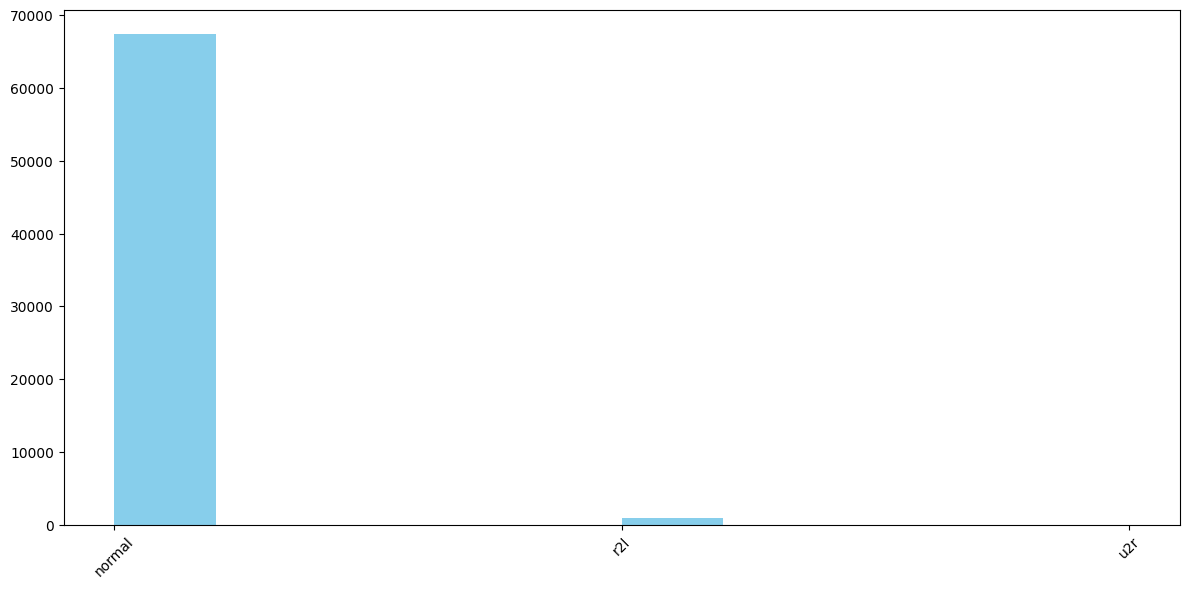

In [1736]:
plot_util(df_train_l2)

#### Heavily unbalanced, undersample the majority class

In [1737]:
from imblearn.under_sampling import RandomUnderSampler as under_sam

sm = under_sam(random_state=42)

# Define the targets
y = np.array([1 if x in (u2r_attacks+r2l_attacks) else 0 for x in df_train_l2['label']])
y = y.astype(int)
targets = pd.DataFrame(y, columns=['target'])

x, y = sm.fit_resample(df_train_l2.reset_index(drop=True),targets)
                                   
x

,srv_count,urgent,root_shell,hot,dst_host_srv_diff_host_rate,dst_host_count,logged_in,dst_host_same_src_port_rate,srv_diff_host_rate,num_shells,...,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
9788,0.362035,0.0,0.0,0.000000,0.00,1.000000,0.0,0.00,0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
16121,0.033268,0.0,0.0,0.000000,0.00,1.000000,1.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
41552,0.001957,0.0,0.0,0.000000,0.01,0.176471,0.0,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
49885,0.001957,0.0,0.0,0.000000,0.00,1.000000,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
21609,0.009785,0.0,0.0,0.000000,0.00,0.243137,0.0,0.02,0.40,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67892,0.003914,0.0,0.0,0.012987,0.00,0.137255,0.0,0.03,0.00,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,guess_passwd
67914,0.001957,0.0,0.0,0.012987,0.00,0.121569,0.0,0.03,0.00,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,guess_passwd
67944,0.003914,0.0,0.0,0.000000,0.13,0.015686,1.0,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,warezclient
67945,0.003914,0.0,0.0,0.000000,0.17,0.031373,1.0,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,warezclient


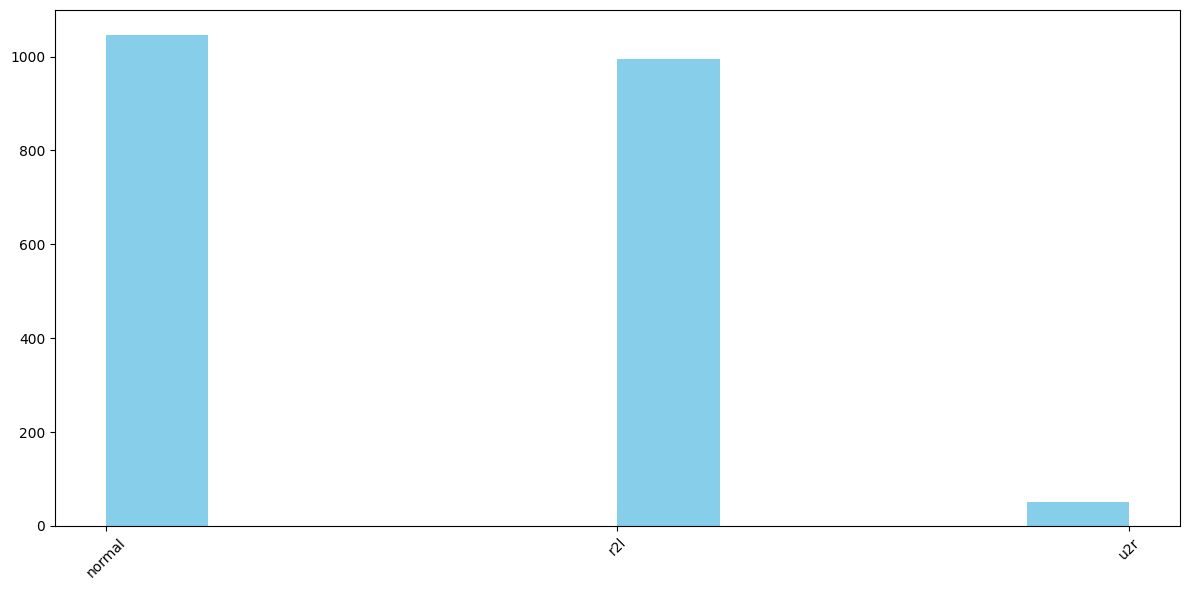

In [1738]:
plot_util(x)

In [1739]:
# Now that the dataset is processed, we can split it into a train set and a validation set for layer 2
y_train_l2 = np.array([1 if el in (r2l_attacks+u2r_attacks) else 0 for el in x['label']])
y_train_l2 = y_train_l2.astype(int)
targets = pd.DataFrame(y_train_l2, columns=['target'])
x_train_l2 = pd.concat([x.reset_index(drop=True).drop('label', axis=1), targets], axis=1)

x_train_l2, x_val_l2 = train_test_split(x_train_l2, test_size=0.2, random_state=42)

x_train_l2

,srv_count,urgent,root_shell,hot,dst_host_srv_diff_host_rate,dst_host_count,logged_in,dst_host_same_src_port_rate,srv_diff_host_rate,num_shells,...,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target
1058,0.001957,0.0,0.0,0.000000,0.12,0.019608,1.0,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1900,0.001957,0.0,0.0,0.000000,0.27,0.003922,1.0,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1034,0.009785,0.0,0.0,0.000000,0.00,1.000000,1.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1808,0.003914,0.0,0.0,0.000000,0.00,0.039216,1.0,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1681,0.003914,0.0,0.0,0.000000,0.08,0.007843,1.0,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.001957,0.0,0.0,0.000000,0.08,0.058824,1.0,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1095,0.001957,0.0,0.0,0.363636,0.00,0.427451,1.0,0.01,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1130,0.003914,0.0,0.0,0.000000,0.15,0.007843,1.0,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1294,0.001957,0.0,0.0,0.000000,0.33,0.003922,1.0,1.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [1740]:
x_val_l2

,srv_count,urgent,root_shell,hot,dst_host_srv_diff_host_rate,dst_host_count,logged_in,dst_host_same_src_port_rate,srv_diff_host_rate,num_shells,...,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target
1712,0.005871,0.0,0.0,0.000000,0.02,0.011765,1.0,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1344,0.001957,0.0,0.0,0.000000,0.00,0.047059,0.0,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
845,0.001957,0.0,0.0,0.000000,0.00,1.000000,0.0,0.02,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
275,0.001957,0.0,0.0,0.000000,0.02,0.501961,1.0,0.01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
29,0.021526,0.0,0.0,0.000000,0.03,0.043137,1.0,0.09,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0.001957,0.0,1.0,0.064935,0.00,0.003922,1.0,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1625,0.001957,0.0,1.0,0.000000,0.00,0.270588,1.0,0.01,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1314,0.001957,0.0,0.0,0.000000,0.09,0.003922,1.0,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1563,0.003914,0.0,0.0,0.000000,0.12,0.054902,1.0,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


# EXPORTING THE DATASETS

In [1741]:
x_train_l1.drop('target', axis=1).to_csv('EvalResources/ProcessedDatasets/x_train_l1.txt', header=False, index=True)
x_train_l2.drop('target', axis=1).to_csv('EvalResources/ProcessedDatasets/x_train_l2.txt', header=False, index=True)
x_val_l1.drop('target', axis=1).to_csv('EvalResources/ProcessedDatasets/x_val_l1.txt', header=False, index=True)
x_val_l2.drop('target', axis=1).to_csv('EvalResources/ProcessedDatasets/x_val_l2.txt', header=False, index=True)



# APPLYING PCA
### Layer 1

In [1742]:
# Reload datasets from disk
x_train_l1 = pd.read_csv('EvalResources/ProcessedDatasets/x_train_l1.txt')
x_train_l2 = pd.read_csv('EvalResources/ProcessedDatasets/x_train_l2.txt')
x_val_l1 = pd.read_csv('EvalResources/ProcessedDatasets/x_val_l1.txt')
x_val_l2 = pd.read_csv('EvalResources/ProcessedDatasets/x_val_l2.txt')

In [1744]:
from sklearn.decomposition import PCA

# Principal Component Analysis
pca_dos_probe = PCA(n_components=0.95)
x_train_l1_pca = pca_dos_probe.fit_transform(x_train_l1)

x_train_l1_pca

array([[-49968.99999908],
       [-49968.00000052],
       [-49967.00000037],
       ...,
       [ 49967.0000008 ],
       [ 49967.99999939],
       [ 49968.99999962]])

In [1745]:
x_val_l1_pca = pca_dos_probe.transform(x_val_l1)

x_val_l1_pca

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 0.00784313725490196
- 0.33
- 0.33.1
- 1.0.7
- 1.0.8
- ...
Feature names seen at fit time, yet now missing:
- 0.0.87
- 0.0.88
- 0.0.89
- 0.0.90
- 0.02
- ...
